# Data Description

We shall use [this](https://www.kaggle.com/mlg-ulb/creditcardfraud) data from Kaggle. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. The variable `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise.



# Downloading Data from Kaggle

- Go to Kaggle's `Accounts` section.
- Delete all pre-existing token if any by clicking on `Expire API Token`.
- Create a new API token by clicking on `Create New API Token`.
- A json file with username and key will be downloaded in the machine.
- Finally upload the json file with the filename `kaggle.json`.

In [2]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitinprasad","key":"8c912c4512f1b09454b576eda05b686e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 92% 61.0M/66.0M [00:00<00:00, 57.8MB/s]
100% 66.0M/66.0M [00:00<00:00, 79.5MB/s]


In [5]:
!ls

creditcardfraud.zip  kaggle.json  sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile("creditcardfraud.zip")
zip_ref.extractall()
zip_ref.close()


In [7]:
rm "creditcardfraud.zip"

# Loading Packages

In [8]:
# Loading common libraries for data manipulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [9]:
Dataset_path="creditcard.csv"

In [10]:
Dataset=pd.read_csv(Dataset_path)

In [11]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
Dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Sampling and splitting Data

We shall split the data into `Training_data` and `Test_data` using SRSWOR with $80\%$ percent transactions in training data and $20\%$ transactions in test data 

In [13]:
Training_data=Dataset.sample(random_state=2,n=int(Dataset.shape[0]*0.8))
Training_index=sorted(Training_data.index.tolist())

Test_index=set(list(range(1,Dataset.shape[0]+1))).difference(Training_index)
Test_data=Dataset[Dataset.index.isin(Test_index)]

In [16]:
# Saving Training data and Test data in the disc.

# Training_data.to_csv("Datasets/Training_data.csv")
# Test_data.to_csv("Datasets/Test_data.csv")

# Data Visualisation

1. We shall plot, project the data points on few 2-D planes to gain more failiarity with the data points. Moreover we make a circle around every projected data point whose area is proportional to the transaction amount.
2. We shall see at what time fraud transaction usually takes place.

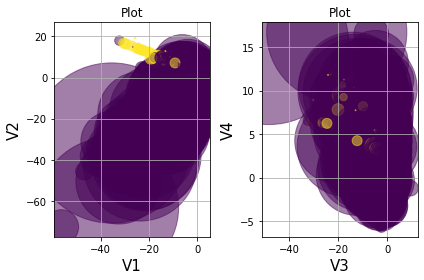

In [14]:
fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(Training_data["V1"],Training_data["V2"], c=Training_data["Class"], s=Training_data["Amount"], alpha=0.5)
ax1.set_xlabel("V1", fontsize=15)
ax1.set_ylabel("V2", fontsize=15)
ax1.set_title('Plot')
ax1.grid(True)

ax2.scatter(Training_data["V3"],Training_data["V4"], c=Training_data["Class"], s=Training_data["Amount"], alpha=0.5)
ax2.set_xlabel("V3", fontsize=15)
ax2.set_ylabel("V4", fontsize=15)
ax2.set_title('Plot')
ax2.grid(True)

fig.tight_layout()

plt.show()

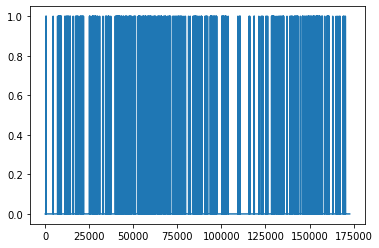

In [15]:
# Time of Frauds 
plt.plot(Dataset["Time"],Dataset["Class"])

## Obervations

1. In the first picture from the second plot, we observe that the fraud transactions are seperable using some non linear curves. Hence, algorithms like Logitic Regression, SVM classifier, Neural Network, Decision Trees can solve our problem.
2. The transaction amount of fraud transactions are small. (Radius of yellow circles is small)
3. From the second picture, it looks like there is no preferable time for fraud transactions.

# Classification metrics

We will now use different classification models and train our model. To measure our model accuracy we shall consider the following performance metrics-
1. **Confusion Matrix:** For a model with $n$ classes, the confusion matrix is an $n\times n$ matrix whose $ij^{th}$ element contains numbers of instances of class $i$ classified as class $j$. For a perfect classifier the matrix will be a diagonal matrix. In our case we have only two classes, $0$ and $1$. We label $0$ as negative and $1$ as positive. Therefore, the confusion matrix takes the following form-

| |Predicted Negative | Predicted Positive |
|---|---|---|
| Actual Negative | TN | FP |
| Actual Positive | FN | TP |

2. **Precision Score:** It is percentage of true positive instances among all positive predicted instances $=\dfrac{TP}{\text{Total Positive} }=\dfrac{TP}{TP+FP}$
3. **Recall:** It is the percentage of true true positive instances among actual positive instances $=\dfrac{TP}{\text{Actual positive instances} }=\dfrac{TP}{TP+FN}$
4. **F$_1$ Score:** It is the harmonic mean of precison and recall. Harmonic mean of two numbers in $[0,1]$ is high only if none of them is very close to zero. Hence, $F_1$ Score is high iff both precision and recall are high and none of them is small.
5. **ROC Curve:** ROC curve plots the true positive rate (recall) against the false positive rate (FPR).





In [16]:
X_train = Training_data.iloc[:,0:29]
amount_train = Training_data["Amount"]
y_train = Training_data["Class"]

X_test = Test_data.iloc[:,0:29]
amount_test = Test_data["Amount"]
y_test = Test_data["Class"]

In [17]:
print(X_train)

            Time        V1        V2  ...       V26       V27       V28
225184  144140.0 -0.581460  0.950267  ... -0.302469 -0.254862 -0.126279
116637   74369.0  0.686730 -0.785586  ... -0.285560  0.022906  0.079838
99414    67107.0 -0.848395  1.214313  ...  0.276440  0.217840  0.127724
217619  140965.0 -1.104465  0.616952  ...  0.520578  0.151103  0.216899
279878  169155.0  2.061985 -0.114758  ...  0.198512 -0.076625 -0.061905
...          ...       ...       ...  ...       ...       ...       ...
252674  155916.0 -1.614316 -2.196613  ... -0.616644  0.167373  0.355476
272493  165116.0  1.865984  0.493816  ... -0.272947 -0.074285 -0.051281
51193    44835.0  1.394441 -0.394118  ... -0.150152 -0.018914  0.011576
226610  144714.0 -6.914008  5.516494  ... -0.193817  0.027400  0.442940
90389    63000.0 -0.539838  1.634835  ...  0.180936  0.316102  0.149896

[227845 rows x 29 columns]


# Centering and Scaling 

Before using any classification algorithm for training our data, we shall center and scale our training data.

In [18]:
from sklearn import preprocessing

In [19]:
scalar=preprocessing.StandardScaler()
scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)

In [20]:
X_train_scaled=pd.DataFrame(X_train_scaled)

# Classification models

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics

## SGD Classifier

In [24]:
import sklearn.linear_model as lm

In [25]:
sgd_clf = lm.SGDClassifier(loss="hinge", penalty="l2", max_iter=300)

In [26]:
skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train_scaled, y_train):
    sgd_clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train_scaled.iloc[train_index,:]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train_scaled.iloc[test_index,:]
    y_test_fold = y_train.iloc[test_index]
    
    sgd_clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = sgd_clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9991178290695072
0.9991441512613893
0.9991441512613893


In [27]:
y_predict_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [28]:
sklearn.metrics.confusion_matrix(y_train, y_predict_sgd)

array([[227416,     32],
       [   162,    235]])

In [29]:
[sklearn.metrics.precision_score(y_train, y_predict_sgd),
sklearn.metrics.recall_score(y_train, y_predict_sgd),
sklearn.metrics.f1_score(y_train, y_predict_sgd)]

[0.8801498127340824, 0.5919395465994962, 0.7078313253012049]

In [30]:
y_sgd_threshold = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, method="decision_function")

In [31]:
sgd_precisions, sgd_recalls, sgd_thresholds = sklearn.metrics.precision_recall_curve(y_train, y_sgd_threshold)

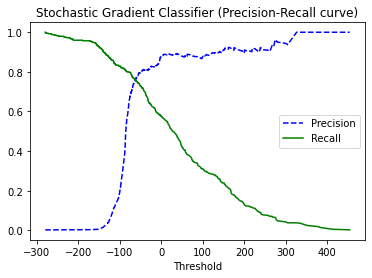

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.title(title+" (Precision-Recall curve)")
    plt.legend() # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds, "Stochastic Gradient Classifier")
plt.show()

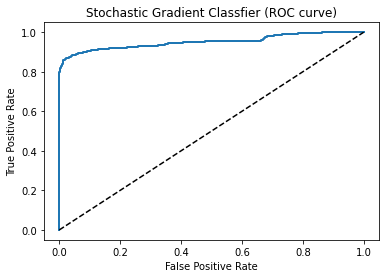

In [33]:
sgd_fpr, sgd_tpr, sgd_thresholds = sklearn.metrics.roc_curve(y_train, y_sgd_threshold)

def plot_roc_curve(fpr, tpr, title, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title+" (ROC curve)")
    [...] # Add axis labels and grid

plot_roc_curve(sgd_fpr, sgd_tpr, "Stochastic Gradient Classfier")
plt.show()

In [34]:
sklearn.metrics.roc_auc_score(y_train, y_sgd_threshold)

0.9517870145999325

We observe that $F_1$ score for SGD Classifier is around $70\%$ with recall around $60\%$. We shall fit more classification and see if they can better explain the model. 

## Logistic regression

In [35]:
lr_clf=lm.LogisticRegression(max_iter=350,random_state=0)
lr_clf.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=350, random_state=0)

In [36]:
skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train_scaled, y_train):
    lr_clone_clf = clone(lr_clf)
    
    X_train_folds = X_train_scaled.iloc[train_index,:]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train_scaled.iloc[test_index,:]
    y_test_fold = y_train.iloc[test_index]
    
    lr_clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = lr_clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9993021632937893
0.9992099857797441
0.9992363195870859


In [37]:
y_predict_lr=cross_val_predict(lr_clf, X_train_scaled, y_train, cv=3)

In [38]:
sklearn.metrics.confusion_matrix(y_train,y_predict_lr)

array([[227417,     31],
       [   140,    257]])

In [39]:
[sklearn.metrics.precision_score(y_train, y_predict_lr),
sklearn.metrics.recall_score(y_train, y_predict_lr),
sklearn.metrics.f1_score(y_train, y_predict_lr)]

[0.8923611111111112, 0.6473551637279596, 0.7503649635036496]

In [40]:
y_lr_threshold = cross_val_predict(lr_clf, X_train_scaled, y_train, cv=3, method="decision_function")
lr_precisions, lr_recalls, lr_thresholds = sklearn.metrics.precision_recall_curve(y_train, y_lr_threshold)

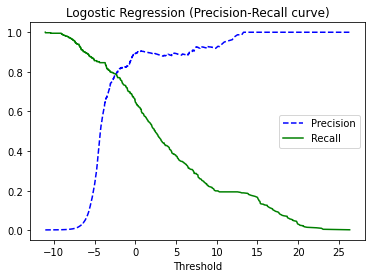

In [41]:
plot_precision_recall_vs_threshold(lr_precisions, lr_recalls, lr_thresholds, "Logostic Regression")
plt.show()

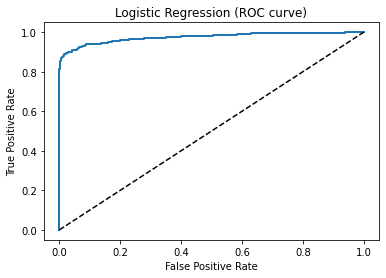

In [42]:
lr_fpr, lr_tpr, lr_thresholds = sklearn.metrics.roc_curve(y_train, y_lr_threshold)

def plot_roc_curve(fpr, tpr, title, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title+" (ROC curve)")
    [...] # Add axis labels and grid

plot_roc_curve(lr_fpr, lr_tpr, "Logistic Regression")
plt.show()

In [43]:
sklearn.metrics.roc_auc_score(y_train, y_lr_threshold)

0.9745023680558712

## Random Forest Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier 

In [51]:
def classification_summary(classifier, X, y):
    
  summary1={}
  skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
  for train_index, test_index in skfolds.split(X, y):
    clf=clone(classifier)
    accuracy_on_folds=[]
    X_train_folds = X.iloc[train_index,:]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index,:]
    y_test_fold = y.iloc[test_index]

    clf.fit(X_train_folds, y_train_folds)
    y_pred = clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy_on_folds.append((n_correct / len(y_pred)))

    y_predict=cross_val_predict(clf, X, y, cv=3)
    summary1["confusion_matrix"]=sklearn.metrics.confusion_matrix(y, y_predict)
    summary1["precision_score"]=sklearn.metrics.precision_score(y, y_predict)
    summary1["recall_score"]=sklearn.metrics.recall_score(y, y_predict)
    summary1["f1_score"]=sklearn.metrics.f1_score(y, y_predict)
  return(summary1)  


In [52]:
classification_summary(RandomForestClassifier(),X_train_scaled,y_train)

{'confusion_matrix': array([[227427,     21],
        [    92,    305]]),
 'f1_score': 0.8437067773167358,
 'precision_score': 0.9355828220858896,
 'recall_score': 0.7682619647355163}

Random Forest Classifier performs achives an $F_1$ score of 0.85 which is the better than that of SGD Classifier and Logistic Regression.

Just like we trained many Decision Trees in Random Forest. We shall train Bagging Classifiers with the base classifiers as Logistic Regression and Fisher LDA.

## Bagging Classifiers

In [55]:
from sklearn.ensemble import BaggingClassifier

In [57]:
summary={}

In [58]:
def bagging_classifiers(classifiers,X,y,B):
    
  # summary={}
  for clf in classifiers:
    summary[str(type(clf))]={}
    skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
    for train_index, test_index in skfolds.split(X, y):
      accuracy_on_folds=[]
      X_train_folds = X.iloc[train_index,:]
      y_train_folds = y.iloc[train_index]
      X_test_fold = X.iloc[test_index,:]
      y_test_fold = y.iloc[test_index]

      bagging_clf=BaggingClassifier(base_estimator=clf,n_estimators=B).fit(X_train_folds,y_train_folds)
      bagging_clf.fit(X_train_folds, y_train_folds)
      y_pred = bagging_clf.predict(X_test_fold)
      n_correct = sum(y_pred == y_test_fold)
      accuracy_on_folds.append((n_correct / len(y_pred)))

      y_predict=cross_val_predict(bagging_clf, X, y, cv=3)
      summary[str(type(clf))]["confusion_matrix"]=sklearn.metrics.confusion_matrix(y, y_predict)
      summary[str(type(clf))]["precision_score"]=sklearn.metrics.precision_score(y, y_predict)
      summary[str(type(clf))]["recall_score"]=sklearn.metrics.recall_score(y, y_predict)
      summary[str(type(clf))]["f1_score"]=sklearn.metrics.f1_score(y, y_predict)
      y_bagging_threshold = cross_val_predict(bagging_clf, X, y, cv=3, method="decision_function")
      bagging_precisions, bagging_recalls, bagging_thresholds = sklearn.metrics.precision_recall_curve(y, y_bagging_threshold)
      summary[str(type(clf))]["precisions"]=bagging_precisions
      summary[str(type(clf))]["recalls"]=bagging_recalls
      summary[str(type(clf))]["thresholds1"]=bagging_thresholds
      # summary[str(type(clf))]["precision-recall-curve"]=plot_precision_recall_vs_threshold(bagging_precisions, bagging_recalls, bagging_thresholds, "Precision-Recall-curve-\nBagging"+str(type(clf)))
      bagging_fpr, bagging_tpr, bagging_thresholds = sklearn.metrics.roc_curve(y, y_bagging_threshold)
      summary[str(type(clf))]["fpr"]=bagging_fpr
      summary[str(type(clf))]["tpr"]=bagging_tpr
      summary[str(type(clf))]["thresholds2"]=bagging_thresholds
      # summary[str(type(clf))]["roc_curve"]=plot_roc_curve(bagging_fpr, bagging_tpr, "Logistic Regression")
      summary[str(type(clf))]["roc_auc_score"]=sklearn.metrics.roc_auc_score(y, y_bagging_threshold)
  return(summary)

In [ ]:
B1=bagging_classifiers([sgd_clf,lr_clf],X_train_scaled,y_train,B=50)

In [ ]:
summary

### Bagging Classifier of SGD classifier

In [66]:
summary[str(type(sgd_clf))].keys()

dict_keys(['confusion_matrix', 'precision_score', 'recall_score', 'f1_score', 'precisions', 'recalls', 'thresholds1', 'precision-recall-curve', 'fpr', 'tpr', 'thresholds2', 'roc_curve', 'roc_auc_score'])

In [80]:
bagging_sgd=summary[str(type(sgd_clf))]

In [84]:
bagging_sgd["confusion_matrix"]

array([[227422,     26],
       [   180,    217]])

In [85]:
[bagging_sgd["precision_score"],
 bagging_sgd["recall_score"],
 bagging_sgd["f1_score"]]

[0.8930041152263375, 0.5465994962216625, 0.678125]

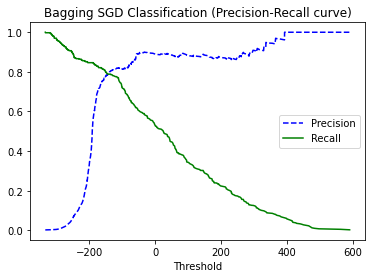

In [81]:
plot_precision_recall_vs_threshold(bagging_sgd["precisions"],
                                   bagging_sgd["recalls"],
                                   bagging_sgd["thresholds1"],
                                   "Bagging SGD Classification")
plt.show()

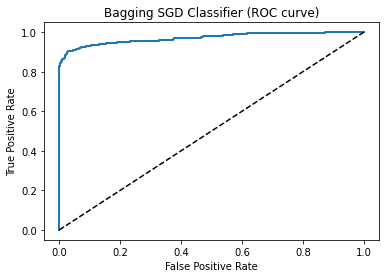

In [82]:
plot_roc_curve(bagging_sgd["fpr"], bagging_sgd["tpr"], "Bagging SGD Classifier")
plt.show()

In [83]:
bagging_sgd["roc_auc_score"]

0.9710340745418644

### Bagging Classifier of Logistic Regression 

In [73]:
summary[str(type(lr_clf))].keys()

dict_keys(['confusion_matrix', 'precision_score', 'recall_score', 'f1_score', 'precisions', 'recalls', 'thresholds1', 'precision-recall-curve', 'fpr', 'tpr', 'thresholds2', 'roc_curve', 'roc_auc_score'])

In [75]:
bagging_lr=summary[str(type(lr_clf))]

In [76]:
[bagging_lr["precision_score"],
 bagging_lr["recall_score"],
 bagging_lr["f1_score"]]

[0.8961937716262975, 0.6523929471032746, 0.7551020408163265]

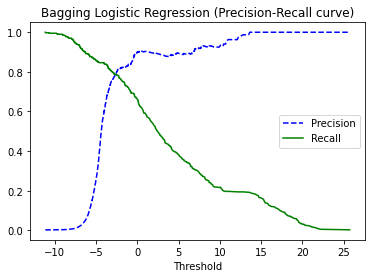

In [77]:
plot_precision_recall_vs_threshold(bagging_lr["precisions"],
                                   bagging_lr["recalls"],
                                   bagging_lr["thresholds1"],
                                   "Bagging Logistic Regression")
plt.show()

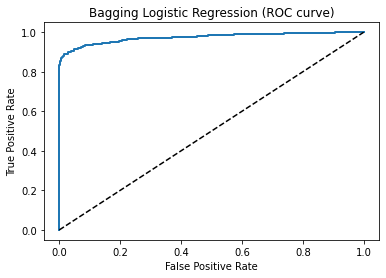

In [78]:
plot_roc_curve(bagging_lr["fpr"], bagging_lr["tpr"], "Bagging Logistic Regression")
plt.show()

In [79]:
bagging_lr["roc_auc_score"]

0.9736332680287341

In [62]:
type(summary)

dict

In [63]:
import pickle

with open("Summary_bagging_lr_and_lda.pkl","wb") as outp:
  pickle.dump(summary,outp,pickle.HIGHEST_PROTOCOL)

# Summary

Following is the summary of the above classification rules

| |Precision | Recall | $F_1$ score | ROC_AUC score |
|---|---|---|---|---|
| SGD Classifier (SGD) | 0.88 | 0.59 | 0.71 | 0.95 |
| Logistic Regression (LR) | 0.89 | 0.65 | 0.75 | 0.97 |
| Random Forests | 0.94 | 0.77 | 0.84 |  |
| Bagging SGD | 0.89 | 0.55 | 0.68 | 0.97 |
| Bagging LR | 0.89 | 0.65 | 0.76 | 0.97 |


We observe that among all the classification models trained above, Random Forests has the best recall and $F_1$ score.


---